In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
sales = pd.read_csv("../data/bookstore_sales.csv")

In [7]:
sales.head()

,date,year,month,store_id,channel,transactions,revenue,gst_collected,net_revenue,dataset
0,2019-01-01,2019,1,YYC-DT,IN_STORE,64,1985.46,99.27,1886.19,bookstore_sales
1,2019-01-01,2019,1,YYC-DT,ONLINE,8,207.72,10.39,197.33,bookstore_sales
2,2019-01-01,2019,1,YYC-NW,IN_STORE,49,1466.95,73.35,1393.60,bookstore_sales
3,2019-01-01,2019,1,YYC-NW,ONLINE,4,148.89,7.44,141.45,bookstore_sales
4,2019-01-01,2019,1,YYC-SE,IN_STORE,33,1272.70,63.64,1209.06,bookstore_sales


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13152 entries, 0 to 13151
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13152 non-null  object 
 1   year           13152 non-null  int64  
 2   month          13152 non-null  int64  
 3   store_id       13152 non-null  object 
 4   channel        13152 non-null  object 
 5   transactions   13152 non-null  int64  
 6   revenue        13152 non-null  float64
 7   gst_collected  13152 non-null  float64
 8   net_revenue    13152 non-null  float64
 9   dataset        13152 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 1.0+ MB


In [9]:
sales["date"] = pd.to_datetime(sales["date"])

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13152 entries, 0 to 13151
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13152 non-null  datetime64[ns]
 1   year           13152 non-null  int64         
 2   month          13152 non-null  int64         
 3   store_id       13152 non-null  object        
 4   channel        13152 non-null  object        
 5   transactions   13152 non-null  int64         
 6   revenue        13152 non-null  float64       
 7   gst_collected  13152 non-null  float64       
 8   net_revenue    13152 non-null  float64       
 9   dataset        13152 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 1.0+ MB


In [11]:
sales.describe()

,date,year,month,transactions,revenue,gst_collected,net_revenue
count,13152,13152.000000,13152.000000,13152.000000,13152.000000,13152.000000,13152.000000
mean,2021-12-31 12:00:00,2021.500456,6.521898,32.601125,1051.288171,52.564473,998.723698
min,2019-01-01 00:00:00,2019.000000,1.000000,3.000000,83.830000,4.190000,79.640000
25%,2020-07-01 18:00:00,2020.000000,4.000000,12.000000,409.035000,20.450000,388.585000
50%,2021-12-31 12:00:00,2021.500000,7.000000,24.000000,780.325000,39.020000,741.305000
75%,2023-07-02 06:00:00,2023.000000,10.000000,49.000000,1586.855000,79.342500,1507.512500
max,2024-12-31 00:00:00,2024.000000,12.000000,154.000000,4279.490000,213.970000,4065.520000
std,NaN,1.708246,3.449117,24.465208,762.231707,38.111537,724.120169


In [12]:
sales.select_dtypes(include="object").nunique()

store_id    3
channel     2
dataset     1
dtype: int64

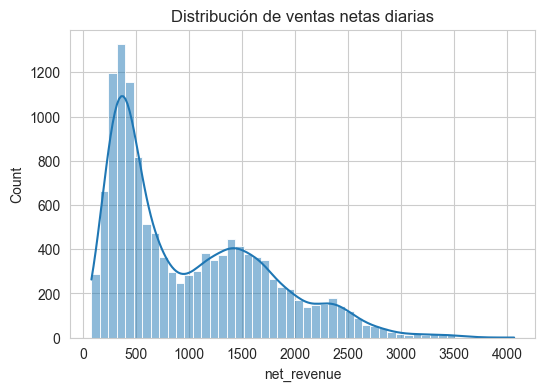

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(sales["net_revenue"], bins=50, kde=True)
plt.title("Distribución de ventas netas diarias")
plt.show()

La distribución de las ventas netas diarias presenta una clara asimetría positiva, con una mayoría de días de ventas moderadas y una cola derecha asociada a picos de alta demanda. Este comportamiento es consistente con un negocio minorista y sugiere la conveniencia de transformaciones logarítmicas en fases posteriores de modelado.

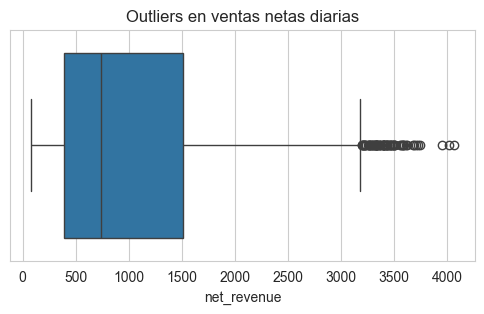

In [14]:
plt.figure(figsize=(6,3))
sns.boxplot(x=sales["net_revenue"])
plt.title("Outliers en ventas netas diarias")
plt.show()

Los valores extremos corresponden a días de alta actividad comercial y no se consideran errores de medición, por lo que se mantienen en el análisis.

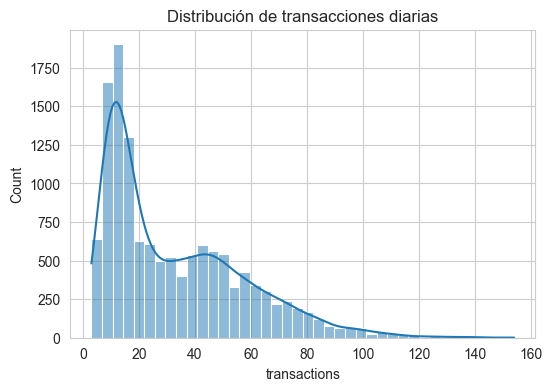

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(sales["transactions"], bins=40, kde=True)
plt.title("Distribución de transacciones diarias")
plt.show()

Las transacciones y las ventas están relacionadas, pero no necesariamente de forma lineal.

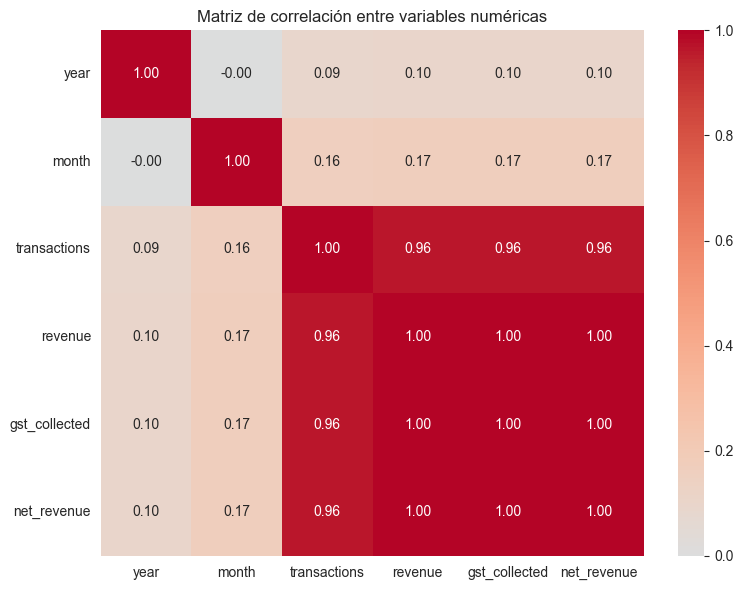

In [16]:
corr = sales.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()


In [17]:
sales_monthly = (
    sales
    .groupby(["year", "month"])
    .agg(
        net_revenue=("net_revenue", "sum"),
        transactions=("transactions", "sum")
    )
    .reset_index()
)

# crea una fecha real mensual
sales_monthly["date"] = pd.to_datetime(
    sales_monthly["year"].astype(str) + "-" +
    sales_monthly["month"].astype(str) + "-01"
)

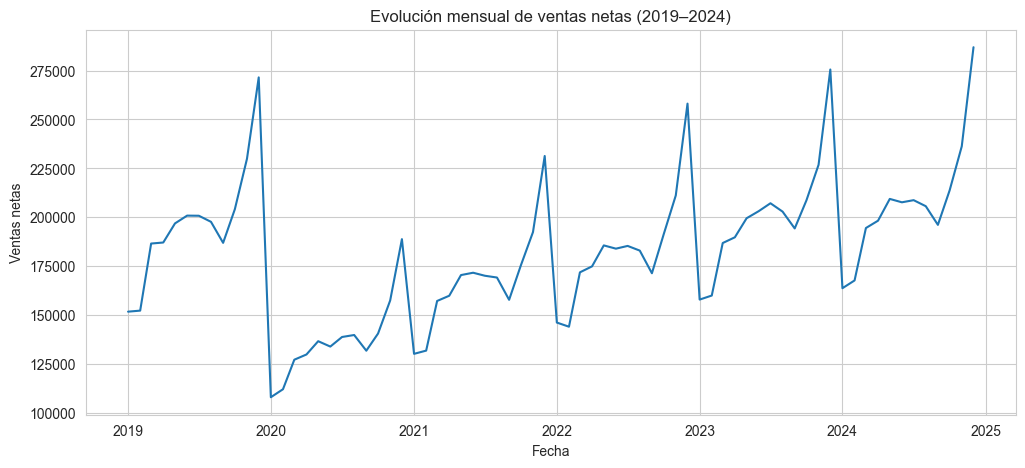

In [18]:
plt.figure(figsize=(12,5))
plt.plot(sales_monthly["date"], sales_monthly["net_revenue"])
plt.title("Evolución mensual de ventas netas (2019–2024)")
plt.xlabel("Fecha")
plt.ylabel("Ventas netas")
plt.show()


El análisis exploratorio de las ventas mensuales muestra una clara tendencia creciente a lo largo del periodo 2019–2024, interrumpida por una caída abrupta durante 2020 asociada al impacto de la pandemia de COVID-19.

A partir de 2021 se observa una recuperación progresiva, consolidándose a partir de 2022 con máximos anuales cada vez más elevados.

Además, se aprecia una estacionalidad marcada, con picos recurrentes en determinados meses del año, lo que sugiere la necesidad de incorporar variables temporales y retardos en futuros modelos predictivos.

In [19]:
sales_store_monthly = (
    sales
    .groupby(["year", "month", "store_id"])
    .agg(net_revenue=("net_revenue", "sum"))
    .reset_index()
)

sales_store_monthly["date"] = pd.to_datetime(
    sales_store_monthly["year"].astype(str) + "-" +
    sales_store_monthly["month"].astype(str) + "-01"
)

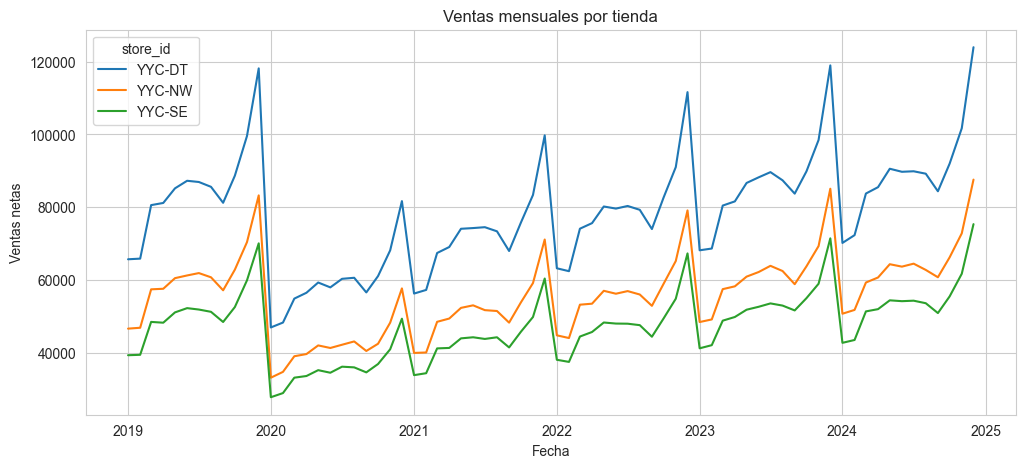

In [20]:
plt.figure(figsize=(12,5))
sns.lineplot(
    data=sales_store_monthly,
    x="date",
    y="net_revenue",
    hue="store_id"
)
plt.title("Ventas mensuales por tienda")
plt.xlabel("Fecha")
plt.ylabel("Ventas netas")
plt.show()

El análisis de ventas mensuales por tienda muestra diferencias estructurales claras entre las tres localizaciones. La tienda Downtown (YYC-DT) presenta el mayor volumen de ventas y una mayor volatilidad, mientras que YYC-NW y YYC-SE muestran un comportamiento más estable y escalonado.

A pesar de estas diferencias, todas las tiendas comparten patrones de estacionalidad y responden de forma similar a shocks externos como la pandemia de COVID-19, lo que sugiere que es posible modelar el negocio de forma conjunta incorporando la tienda como variable explicativa.

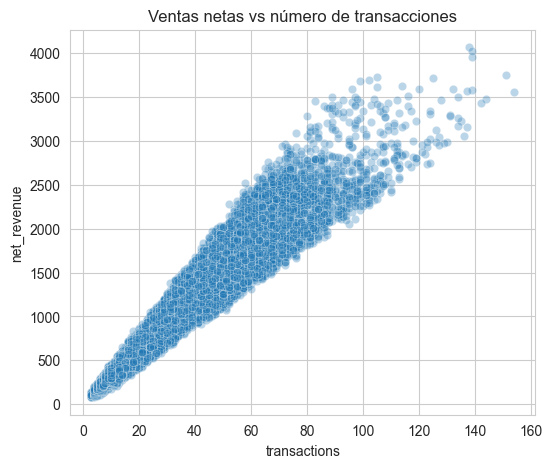

In [21]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=sales,
    x="transactions",
    y="net_revenue",
    alpha=0.3
)
plt.title("Ventas netas vs número de transacciones")
plt.show()

El análisis bivariante entre ventas netas y número de transacciones muestra una fuerte relación positiva, aunque no estrictamente lineal. A medida que aumenta el volumen de transacciones, también lo hace la dispersión de los ingresos, lo que sugiere diferencias en el ticket medio y la influencia de otras variables como la tienda o el canal de venta.

#### ticket_medio = net_revenue / transactions